# PLOTTING IN PYTHON

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('../data/penguins_simple.csv', sep=';')  #change path to your local copy of the data

In [3]:
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


## 1. Plotting with pandas

<AxesSubplot:>

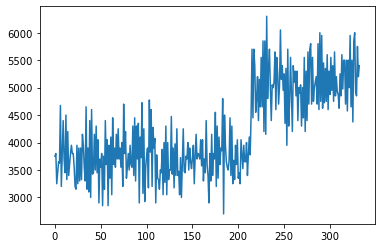

In [4]:
#plot one column
df['Body Mass (g)'].plot()   #default: line-plot.

<AxesSubplot:>

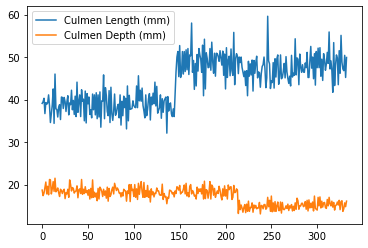

In [5]:
# plot two columns
df[['Culmen Length (mm)', 'Culmen Depth (mm)']].plot()  #automatic legend

#### Let's try to answer following questions!
1. Do larger penguins have longer flippers?  

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

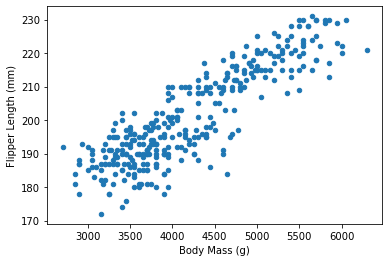

In [6]:
# plot one column against another
df.plot(x='Body Mass (g)', y= 'Flipper Length (mm)', kind='scatter')  # second kind of syntax

2. Visualize the distribution of Culmen Length

<AxesSubplot:ylabel='Frequency'>

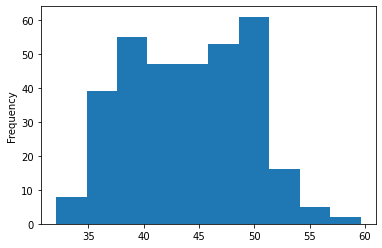

In [7]:
df['Culmen Length (mm)'].plot(kind='hist')

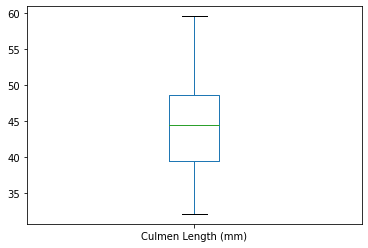

In [18]:
# or using a box plot
# green line is median ; splits the samples into an equal numbered halfs
# line below green line is 25th percentile of the sample
# line above green line is 75th percentile of the sample
# The box has a fancy name called 'IQR' ; inter quartile range
# Anything that beyond that will be shown as dots after the whiskers and those considered outliers

_ = df['Culmen Length (mm)'].plot(kind='box')

3. Are male penguins heavier than female penguins?

<AxesSubplot:ylabel='Frequency'>

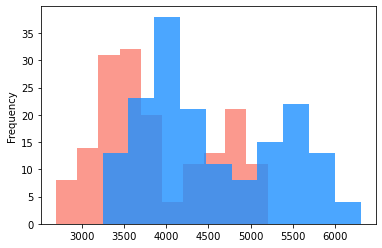

In [9]:
# Selecting by conditions, plotting two in one, introducing alpha, histogram
# More colored names is here, https://matplotlib.org/stable/gallery/color/named_colors.html

df['Body Mass (g)'].loc[df['Sex'] == 'FEMALE'].plot(alpha = 0.8, kind='hist', color='salmon')  
df['Body Mass (g)'].loc[df['Sex'] == 'MALE'].plot(alpha = 0.8, kind='hist', color='dodgerblue')

In [10]:
# here we now see: maybe we want to adjust some things, cusotmizer, add a legend,... 
# for this, we need to look a bit deeper. 

#### Other plots with pandas: 
check the documentation here: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

## 2. Plotting with Matplotlib

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
# Build the next plot up gradually:

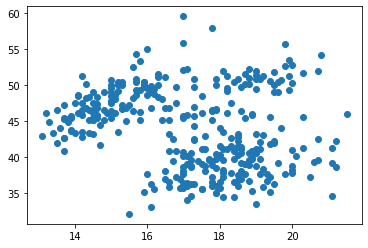

In [13]:
plt.scatter(df['Culmen Depth (mm)'], df['Culmen Length (mm)'])  
# or: plt.plot, plt.bar, plt.boxplot, plt.hist,... 

plt.show()  # add this and explain that it is needed in other kinds of editors
# really "raw", no labels, ...

#### Add title and labels

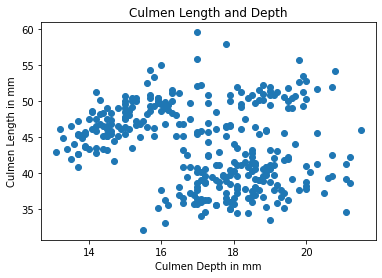

In [14]:
plt.scatter(df['Culmen Depth (mm)'], df['Culmen Length (mm)']) 
plt.title('Culmen Length and Depth')
plt.xlabel('Culmen Depth in mm')
plt.ylabel('Culmen Length in mm')
plt.show()


#### More formatting

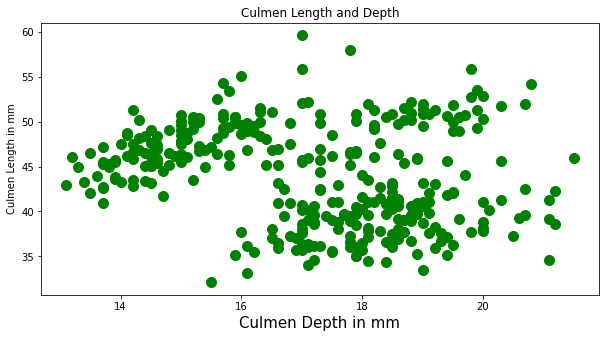

In [15]:
# formatting "datapoints", add s, c, marker
plt.figure(figsize=(10,5))  #order! First step before plot is drawn

# s is the marker size , and another use for markers is for example o
plt.scatter(df['Culmen Depth (mm)'], df['Culmen Length (mm)'], s=100, c="green", marker ='o') 

# look in the doc here what we can change.
plt.title('Culmen Length and Depth')

# x 
plt.xlabel('Culmen Depth in mm', fontsize=15)

# y
plt.ylabel('Culmen Length in mm')

plt.show()

# for other plots: different parameters, e.g. linewidth,...

In [78]:
# some formatting options: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Multiple plots in one

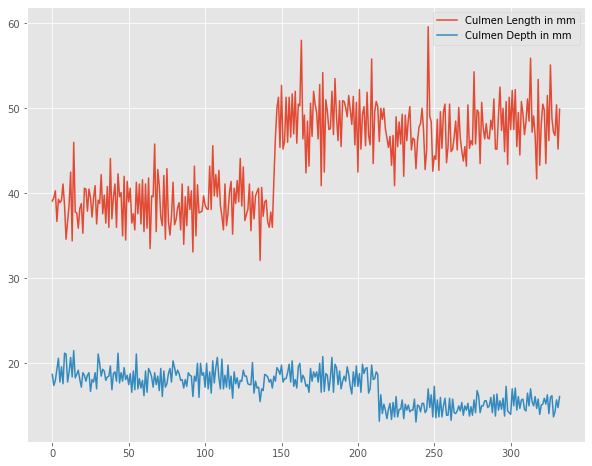

In [80]:
# first: multiple plots. then: add legend, add style. 
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.plot(df['Culmen Length (mm)'], label='Culmen Length in mm')
plt.plot(df['Culmen Depth (mm)'], label='Culmen Depth in mm')
plt.legend() # can also give list of labels here, in order.
 #defaults for colors, grid, labels, etc -> can be overwritten though. try out a couple.

In [81]:
plt.style.available
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Gallery: https://matplotlib.org/3.1.0/gallery/index.html  
Great youtube series on matplotlib: https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_

## 3. Plotting with Seaborn
- more examples in the course material

In [82]:
#!pip install seaborn

In [83]:
import seaborn as sns

Text(0.5, 1.0, 'Culmen Length and depth by Species')

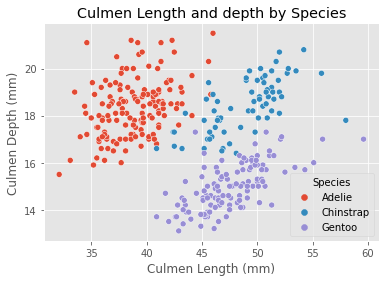

In [84]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')  #first without "hue"
plt.title('Culmen Length and depth by Species')
# color palettes (google seabron colors)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body Mass (g)', ylabel='Density'>

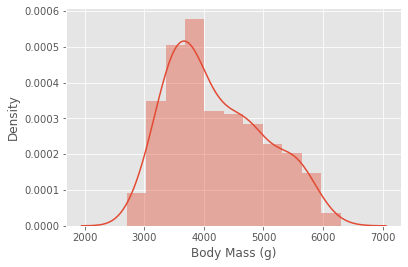

In [50]:
sns.distplot(df['Body Mass (g)'])

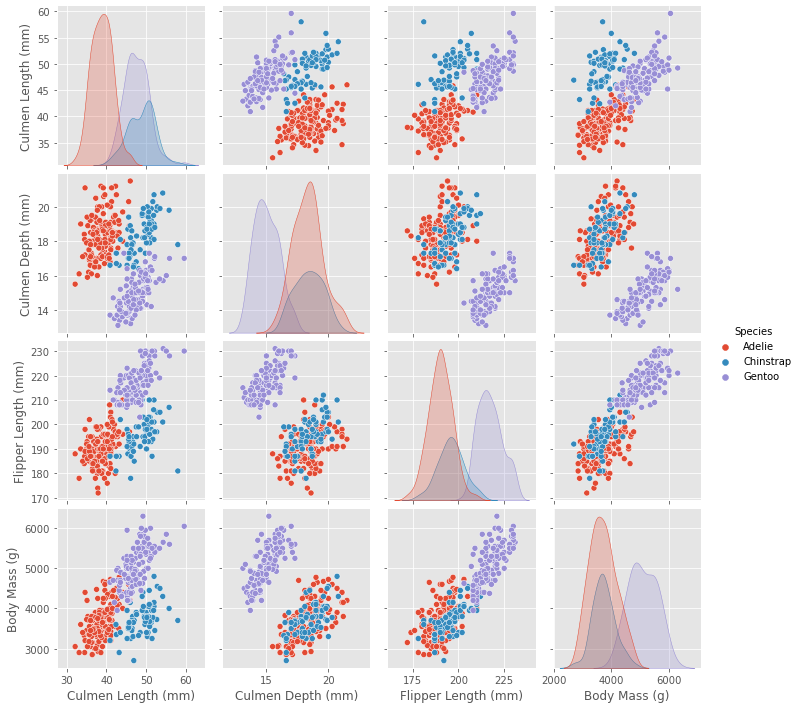

In [52]:
# usually one of the first things i would do when i am exploring data

sns.pairplot(data=df, hue='Species')

#### Exercises with seaborn and matplotlib: 
- Draw a histogram that shows how many penguins of each species are in the data
- create a plot of your choosing that only shows the data of female Gentoos.
- Create a scatterplot of the culmen length and depth where the size of the markers represent the Body mass of the penguin
- Find at least one more way (besides a scatterplot) to visualize the relationship between culmen lenght and depth (or another bivariate distribution)

## Abit more plotting

#### Subplots
In matplotlib, the "figure" is like a container that holds plots (called "axes"). 
You can create a grid of plots, e.g. with two plots in one figure like this: 


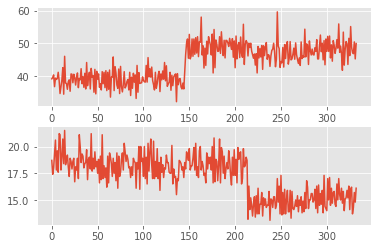

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) 
ax1.plot(df['Culmen Length (mm)'])   #specifies first plot
ax2.plot(df['Culmen Depth (mm)'])     # specifies second plot

### Libraries for more plotting:  plotly, bokeh, d3